<a href="https://colab.research.google.com/github/d982h8st7/DataAnalysis/blob/main/(tf_idf)for_Hackerton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [3]:
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
!conda install openmm
!conda env update -n base -f environment.yml

In [ ]:
!pip install tensorflow
!pip install keras
!pip install scikit-learn
!conda install gensim
!conda install seaborn
!conda install ipykernel
!conda install nltk
!conda install pandas
!conda install scipy
!conda install
!pip install -U pandas-profiling
!pip install konlpy
!pip install jupyter

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [20]:
!ls /usr/share/fonts/truetype/nanum

NanumBarunGothicBold.ttf	NanumGothicEcoR.ttf	       NanumPen.ttf
NanumBarunGothicLight.ttf	NanumGothicEco.ttf	       NanumSquare_acB.ttf
NanumBarunGothic.ttf		NanumGothicExtraBold.ttf       NanumSquare_acEB.ttf
NanumBarunGothicUltraLight.ttf	NanumGothicLight.ttf	       NanumSquare_acL.ttf
NanumBarunGothic-YetHangul.ttf	NanumGothic.ttf		       NanumSquare_acR.ttf
NanumBarunpenB.ttf		NanumMyeongjoBold.ttf	       NanumSquareB.ttf
NanumBarunpenR.ttf		NanumMyeongjoEcoBold.ttf       NanumSquareEB.ttf
NanumBrush.ttf			NanumMyeongjoEcoExtraBold.ttf  NanumSquareL.ttf
NanumGothicBold.ttf		NanumMyeongjoEcoR.ttf	       NanumSquareRoundB.ttf
NanumGothicCodingBold.ttf	NanumMyeongjoEco.ttf	       NanumSquareRoundEB.ttf
NanumGothicCoding.ttf		NanumMyeongjoExtraBold.ttf     NanumSquareRoundL.ttf
NanumGothicEcoBold.ttf		NanumMyeongjo.ttf	       NanumSquareRoundR.ttf
NanumGothicEcoExtraBold.ttf	NanumMyeongjo-YetHangul.ttf    NanumSquareR.ttf


In [23]:
import logging
import matplotlib
logging.getLogger("matplotlib").setLevel(logging.ERROR)

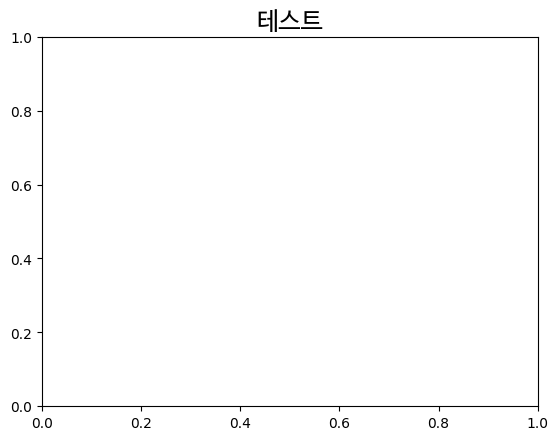

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.title('테스트', fontproperties=fontprop)
plt.show()

In [25]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy import *
from sklearn.model_selection import train_test_split

In [8]:
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt",
     filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7d7dcd08b010>)

In [26]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data))

전체 리뷰 개수 : 200000


In [27]:
total_data[:5]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


# 전처리 1

## Setting lable

<Axes: xlabel='ratings'>

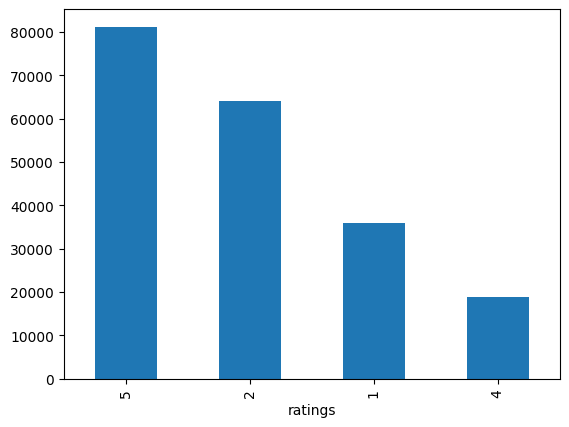

In [28]:
total_data['ratings'].value_counts().plot(kind = 'bar')

In [29]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data[:5]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


## Refining

In [30]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()

(4, 199908, 2)

In [31]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 199908


In [32]:
print(total_data.isnull().values.any())

False


In [33]:
total_data['label'].value_counts()

label
0    99955
1    99953
Name: count, dtype: int64

In [34]:
print(total_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  99955
1      1  99953


In [35]:
total_data['reviews'] = total_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
total_data['reviews'].replace('', np.nan, inplace=True)
print(total_data.isnull().sum())

ratings    0
reviews    0
label      0
dtype: int64


In [36]:
total_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
total_data['reviews'] = total_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
total_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
total_data = total_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(total_data))

전처리 후 테스트용 샘플의 개수 : 199908


In [37]:
total_data

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...,...
199995,2,장마라그런가!!! 달지않아요,0
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,1
199998,5,넘이쁘고 쎄련되보이네요~,1


## Stopword

In [38]:
stopwords = ['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라',
             '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여',
             '근거하여', '입각하여', '기준으로', '예하면', '예를', '들면', '예를', '들자면',
             '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한',
             '그리고', '비길수', '없다', '해서는', '안된다', '뿐만', '아니라', '만이', '아니다', '만은',
             '아니다', '막론하고', '관계없이', '그치지', '않다', '그러나', '그런데', '하지만', '든간에',
             '논하지', '않다', '따지지', '않다', '설사', '비록', '더라도', '아니면', '만', '못하다', '하는',
             '편이', '낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다',
             '오르다', '제외하고', '이', '외에', '이', '밖에', '하여야', '비로소', '한다면', '몰라도', '외에도',
             '이곳', '여기', '부터', '기점으로', '따라서', '할', '생각이다', '하려고하다', '이리하여', '그리하여',
             '그렇게', '함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써',
             '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에', '틀림없다',
             '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여',
             '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금',
             '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해',
             '말하자면', '뿐이다', '다음에', '반대로', '반대로', '말하자면', '이와', '반대로', '바꾸어서', '말하면',
             '바꾸어서', '한다면', '만약', '그렇지않으면', '까악', '툭', '딱', '삐걱거리다', '보드득', '비걱거리다',
             '꽈당', '응당', '해야한다', '에', '가서', '각', '각각', '여러분', '각종', '각자', '제각기', '하도록하다',
             '와', '과', '그러므로', '그래서', '고로', '한', '까닭에', '하기', '때문에', '거니와', '이지만', '대하여',
             '관하여', '관한', '과연', '실로', '아니나다를가', '생각한대로', '진짜로', '한적이있다', '하곤하였다', '하',
             '하하', '허허', '아하', '거바', '와', '오', '왜', '어째서', '무엇때문에', '어찌', '하겠는가', '무슨', '어디',
             '어느곳', '더군다나', '하물며', '더욱이는', '어느때', '언제', '야', '이봐', '어이', '여보시오', '흐흐',
             '흥', '휴', '헉헉', '헐떡헐떡', '영차', '여차', '어기여차', '끙끙', '아야', '앗', '아야', '콸콸',
             '졸졸', '좍좍', '뚝뚝', '주룩주룩', '솨', '우르르', '그래도', '또', '그리고', '바꾸어말하면', '바꾸어말하자면',
             '혹은', '혹시', '답다', '및', '그에', '따르는', '때가', '되어', '즉', '지든지', '설령', '가령',
             '하더라도', '할지라도', '일지라도', '지든지', '몇', '거의', '하마터면', '인젠', '이젠', '된바에야',
             '된이상', '만큼', '어찌됏든', '그위에', '게다가', '점에서', '보아', '비추어', '보아', '고려하면',
             '하게될것이다', '일것이다', '비교적', '좀', '보다더', '비하면', '시키다', '하게하다', '할만하다',
             '의해서', '연이서', '이어서', '잇따라', '뒤따라', '뒤이어', '결국', '의지하여', '기대여', '통하여',
             '자마자', '더욱더', '불구하고', '얼마든지', '마음대로', '주저하지', '않고', '곧', '즉시', '바로', '당장',
             '하자마자', '밖에', '안된다', '하면된다', '그래', '그렇지', '요컨대', '다시', '말하자면', '바꿔',
             '말하면', '즉', '구체적으로', '말하자면', '시작하여', '시초에', '이상', '허', '헉', '허걱', '바와같이',
             '해도좋다', '해도된다', '게다가', '더구나', '하물며', '와르르', '팍', '퍽', '펄렁', '동안', '이래',
             '하고있었다', '이었다', '에서', '로부터', '까지', '예하면', '했어요', '해요', '함께', '같이', '더불어',
             '마저', '마저도', '양자', '모두', '습니다', '가까스로', '하려고하다', '즈음하여', '다른', '다른',
             '방면으로', '해봐요', '습니까', '했어요', '말할것도', '없고', '무릎쓰고', '개의치않고', '하는것만', '못하다',
             '하는것이', '낫다', '매', '매번', '들', '모', '어느것', '어느', '로써', '갖고말하자면', '어디', '어느쪽',
             '어느것', '어느해', '어느', '년도', '라', '해도', '언젠가', '어떤것', '어느것', '저기', '저쪽', '저것',
             '그때', '그럼', '그러면', '요만한걸', '그래', '그때', '저것만큼', '그저', '이르기까지', '할', '줄', '안다',
             '할', '힘이', '있다', '너', '너희', '당신', '어찌', '설마', '차라리', '할지언정', '할지라도',
             '할망정', '할지언정', '구토하다', '게우다', '토하다', '메쓰겁다', '옆사람', '퉤', '쳇', '의거하여',
             '근거하여', '의해', '따라', '힘입어', '그', '다음', '버금', '두번째로', '기타', '첫번째로', '나머지는',
             '그중에서', '견지에서', '형식으로', '쓰여', '입장에서', '위해서', '단지', '의해되다', '하도록시키다',
             '뿐만아니라', '반대로', '전후', '전자', '앞의것', '잠시', '잠깐', '하면서', '그렇지만', '다음에',
             '그러한즉', '그런즉', '남들', '아무거나', '어찌하든지', '같다', '비슷하다', '예컨대', '이럴정도로',
             '어떻게', '만약', '만일', '위에서', '서술한바와같이', '인', '듯하다', '하지', '않는다면', '만약에',
             '무엇', '무슨', '어느', '어떤', '아래윗', '조차', '한데', '그럼에도', '불구하고', '여전히', '심지어',
             '까지도', '조차도', '하지', '않도록', '않기', '위하여', '때', '시각', '무렵', '시간', '동안', '어때',
             '어떠한', '하여금', '네', '예', '우선', '누구', '누가', '알겠는가', '아무도', '줄은모른다', '줄은', '몰랏다',
             '하는', '김에', '겸사겸사', '하는바', '그런', '까닭에', '한', '이유는', '그러니', '그러니까', '때문에', '그',
             '너희', '그들', '너희들', '타인', '것', '것들', '너', '위하여', '공동으로', '동시에', '하기', '위하여',
             '어찌하여', '무엇때문에', '붕붕', '윙윙', '나', '우리', '엉엉', '휘익', '윙윙', '오호', '아하', '어쨋든',
             '만', '못하다', '하기보다는', '차라리', '하는', '편이', '낫다', '흐흐', '놀라다', '상대적으로', '말하자면',
             '마치', '아니라면', '쉿', '그렇지', '않으면', '그렇지', '않다면', '안', '그러면', '아니었다면', '하든지',
             '아니면', '이라면', '좋아', '알았어', '하는것도', '그만이다', '어쩔수', '없다', '하나', '일', '일반적으로',
             '일단', '한켠으로는', '오자마자', '이렇게되면', '이와같다면', '전부', '한마디', '한항목', '근거로', '하기에',
             '아울러', '하지', '않도록', '않기', '위해서', '이르기까지', '이', '되다', '로', '인하여', '까닭으로',
             '이유만으로', '이로', '인하여', '그래서', '이', '때문에', '그러므로', '그런', '까닭에', '알', '수', '있다',
             '결론을', '낼', '수', '있다', '으로', '인하여', '있다', '어떤것', '관계가', '있다', '관련이', '있다',
             '연관되다', '어떤것들', '에', '대해', '이리하여', '그리하여', '여부', '하기보다는', '하느니', '하면', '할수록',
             '운운', '이러이러하다', '하구나', '하도다', '다시말하면', '다음으로', '에', '있다', '에', '달려', '있다', '우리',
             '우리들', '오히려', '하기는한데', '어떻게', '어떻해', '어찌됏어', '어때', '어째서', '본대로', '자', '이',
             '이쪽', '여기', '이것', '이번', '이렇게말하자면', '이런', '이러한', '이와', '같은', '요만큼', '요만한', '것',
             '얼마', '안', '되는', '것', '이만큼', '이', '정도의', '이렇게', '많은', '것', '이와', '같다', '이때', '이렇구나',
             '것과', '같이', '끼익', '삐걱', '따위', '와', '같은', '사람들', '부류의', '사람들', '왜냐하면', '중의하나', '오직',
             '오로지', '에', '한하다', '하기만', '하면', '도착하다', '까지', '미치다', '도달하다', '정도에', '이르다', '할',
             '지경이다', '결과에', '이르다', '관해서는', '여러분', '하고', '있다', '한', '후', '혼자', '자기', '자기집', '자신',
             '우에', '종합한것과같이', '총적으로', '보면', '총적으로', '말하면', '총적으로', '대로', '하다', '으로서', '참',
             '그만이다', '할', '따름이다', '쿵', '탕탕', '쾅쾅', '둥둥', '봐', '봐라', '아이야', '아니', '와아', '응', '아이',
             '참나', '년', '월', '일', '령', '영', '일', '이', '삼', '사', '오', '육', '륙', '칠', '팔', '구', '이천육',
             '이천칠', '이천팔', '이천구', '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [48]:
len(stopwords)

789

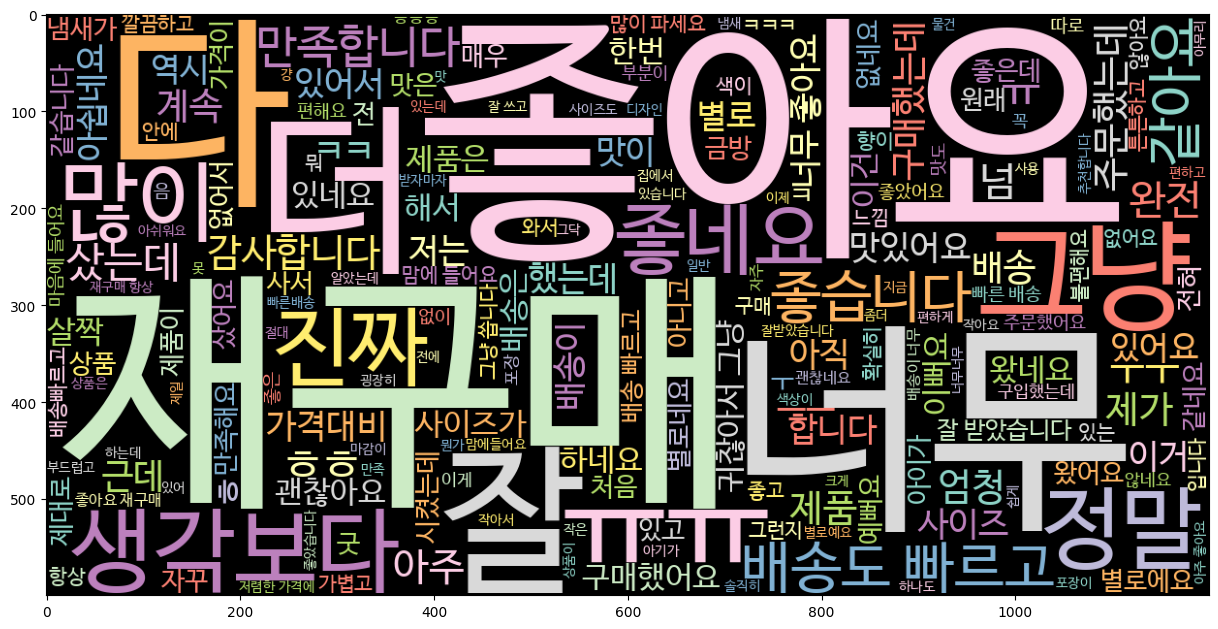

In [39]:
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

wordcloud1 = WordCloud(font_path='NanumBarunGothic.ttf',
                       stopwords = stopwords,
                       colormap='Set3',
                       background_color = 'black',
                       width = 1200, height = 600).generate(' '.join(total_data['reviews']))

plt.figure(figsize = (15, 20))
plt.imshow(wordcloud1)
plt.axis("on")
plt.show()

In [40]:
wordcloud1.to_svg()

'<svg xmlns="http://www.w3.org/2000/svg" width="1200" height="600">\n<style>text{font-family:\'NanumBarunGothic\';font-weight:normal;font-style:normal;}</style>\n<rect width="100%" height="100%" style="fill:black"></rect>\n<text transform="translate(388,217)" font-size="271" style="fill:rgb(252, 205, 229)">좋아요</text>\n<text transform="translate(15,476)" font-size="262" style="fill:rgb(204, 235, 197)">재구매</text>\n<text transform="translate(705,504)" font-size="232" style="fill:rgb(217, 217, 217)">너무</text>\n<text transform="translate(62,172)" font-size="211" style="fill:rgb(253, 180, 98)">다</text>\n<text transform="translate(217,244)" font-size="188" style="fill:rgb(252, 205, 229)">더</text>\n<text transform="translate(407,577)" font-size="166" style="fill:rgb(217, 217, 217)">잘</text>\n<text transform="translate(962,311)" font-size="123" style="fill:rgb(251, 128, 114)">그냥</text>\n<text transform="translate(533,568)" font-size="120" style="fill:rgb(252, 205, 229)">ㅠㅠ</text>\n<text transfo

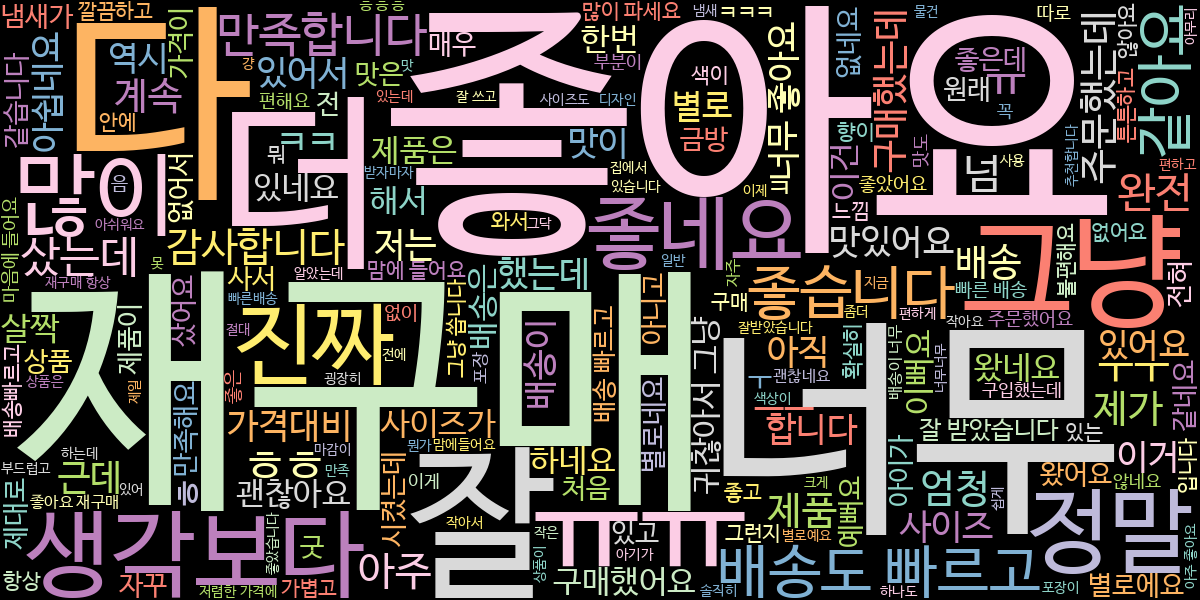

In [41]:
wordcloud1.to_image()

In [42]:
train_data, test_data = train_test_split(total_data,
                                         test_size = 0.1,
                                         random_state = 42)

print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 179917
테스트용 리뷰의 개수 : 19991


## Check Lable spread

<Axes: xlabel='label'>

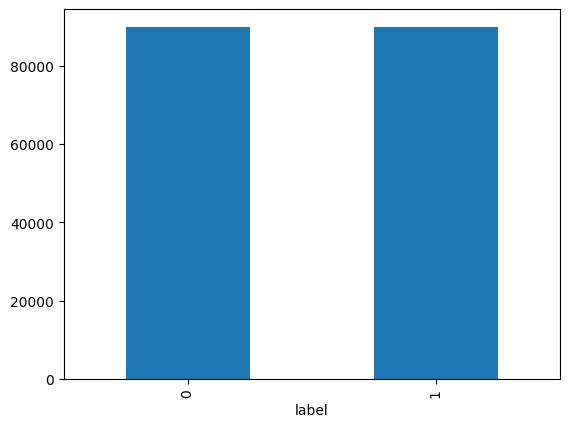

In [43]:
train_data['label'].value_counts().plot(kind = 'bar')

<Axes: xlabel='label'>

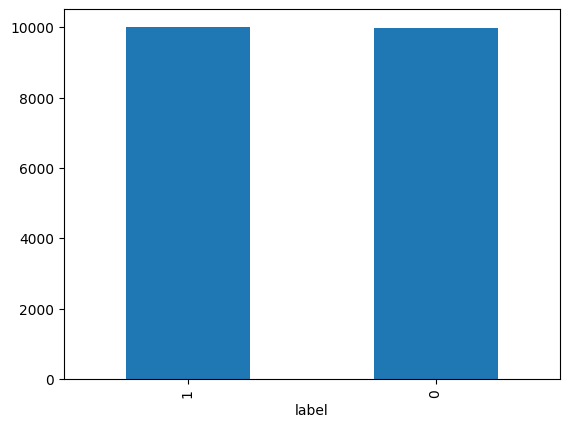

In [47]:
test_data['label'].value_counts().plot(kind = 'bar')

# 전처리2

In [44]:
from konlpy.tag import Okt
okt = Okt()
def okt_tokenizer(text):
    tokens = okt.morphs(text)
    return tokens

## TF-IDF

29분 34초 걸림

In [45]:
stopwords = ['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라',
             '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여',
             '근거하여', '입각하여', '기준으로', '예하면', '예를', '들면', '예를', '들자면',
             '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한',
             '그리고', '비길수', '없다', '해서는', '안된다', '뿐만', '아니라', '만이', '아니다', '만은',
             '아니다', '막론하고', '관계없이', '그치지', '않다', '그러나', '그런데', '하지만', '든간에',
             '논하지', '않다', '따지지', '않다', '설사', '비록', '더라도', '아니면', '만', '못하다', '하는',
             '편이', '낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다',
             '오르다', '제외하고', '이', '외에', '이', '밖에', '하여야', '비로소', '한다면', '몰라도', '외에도',
             '이곳', '여기', '부터', '기점으로', '따라서', '할', '생각이다', '하려고하다', '이리하여', '그리하여',
             '그렇게', '함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써',
             '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에', '틀림없다',
             '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여',
             '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금',
             '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해',
             '말하자면', '뿐이다', '다음에', '반대로', '반대로', '말하자면', '이와', '반대로', '바꾸어서', '말하면',
             '바꾸어서', '한다면', '만약', '그렇지않으면', '까악', '툭', '딱', '삐걱거리다', '보드득', '비걱거리다',
             '꽈당', '응당', '해야한다', '에', '가서', '각', '각각', '여러분', '각종', '각자', '제각기', '하도록하다',
             '와', '과', '그러므로', '그래서', '고로', '한', '까닭에', '하기', '때문에', '거니와', '이지만', '대하여',
             '관하여', '관한', '과연', '실로', '아니나다를가', '생각한대로', '진짜로', '한적이있다', '하곤하였다', '하',
             '하하', '허허', '아하', '거바', '와', '오', '왜', '어째서', '무엇때문에', '어찌', '하겠는가', '무슨', '어디',
             '어느곳', '더군다나', '하물며', '더욱이는', '어느때', '언제', '야', '이봐', '어이', '여보시오', '흐흐',
             '흥', '휴', '헉헉', '헐떡헐떡', '영차', '여차', '어기여차', '끙끙', '아야', '앗', '아야', '콸콸',
             '졸졸', '좍좍', '뚝뚝', '주룩주룩', '솨', '우르르', '그래도', '또', '그리고', '바꾸어말하면', '바꾸어말하자면',
             '혹은', '혹시', '답다', '및', '그에', '따르는', '때가', '되어', '즉', '지든지', '설령', '가령',
             '하더라도', '할지라도', '일지라도', '지든지', '몇', '거의', '하마터면', '인젠', '이젠', '된바에야',
             '된이상', '만큼', '어찌됏든', '그위에', '게다가', '점에서', '보아', '비추어', '보아', '고려하면',
             '하게될것이다', '일것이다', '비교적', '좀', '보다더', '비하면', '시키다', '하게하다', '할만하다',
             '의해서', '연이서', '이어서', '잇따라', '뒤따라', '뒤이어', '결국', '의지하여', '기대여', '통하여',
             '자마자', '더욱더', '불구하고', '얼마든지', '마음대로', '주저하지', '않고', '곧', '즉시', '바로', '당장',
             '하자마자', '밖에', '안된다', '하면된다', '그래', '그렇지', '요컨대', '다시', '말하자면', '바꿔',
             '말하면', '즉', '구체적으로', '말하자면', '시작하여', '시초에', '이상', '허', '헉', '허걱', '바와같이',
             '해도좋다', '해도된다', '게다가', '더구나', '하물며', '와르르', '팍', '퍽', '펄렁', '동안', '이래',
             '하고있었다', '이었다', '에서', '로부터', '까지', '예하면', '했어요', '해요', '함께', '같이', '더불어',
             '마저', '마저도', '양자', '모두', '습니다', '가까스로', '하려고하다', '즈음하여', '다른', '다른',
             '방면으로', '해봐요', '습니까', '했어요', '말할것도', '없고', '무릎쓰고', '개의치않고', '하는것만', '못하다',
             '하는것이', '낫다', '매', '매번', '들', '모', '어느것', '어느', '로써', '갖고말하자면', '어디', '어느쪽',
             '어느것', '어느해', '어느', '년도', '라', '해도', '언젠가', '어떤것', '어느것', '저기', '저쪽', '저것',
             '그때', '그럼', '그러면', '요만한걸', '그래', '그때', '저것만큼', '그저', '이르기까지', '할', '줄', '안다',
             '할', '힘이', '있다', '너', '너희', '당신', '어찌', '설마', '차라리', '할지언정', '할지라도',
             '할망정', '할지언정', '구토하다', '게우다', '토하다', '메쓰겁다', '옆사람', '퉤', '쳇', '의거하여',
             '근거하여', '의해', '따라', '힘입어', '그', '다음', '버금', '두번째로', '기타', '첫번째로', '나머지는',
             '그중에서', '견지에서', '형식으로', '쓰여', '입장에서', '위해서', '단지', '의해되다', '하도록시키다',
             '뿐만아니라', '반대로', '전후', '전자', '앞의것', '잠시', '잠깐', '하면서', '그렇지만', '다음에',
             '그러한즉', '그런즉', '남들', '아무거나', '어찌하든지', '같다', '비슷하다', '예컨대', '이럴정도로',
             '어떻게', '만약', '만일', '위에서', '서술한바와같이', '인', '듯하다', '하지', '않는다면', '만약에',
             '무엇', '무슨', '어느', '어떤', '아래윗', '조차', '한데', '그럼에도', '불구하고', '여전히', '심지어',
             '까지도', '조차도', '하지', '않도록', '않기', '위하여', '때', '시각', '무렵', '시간', '동안', '어때',
             '어떠한', '하여금', '네', '예', '우선', '누구', '누가', '알겠는가', '아무도', '줄은모른다', '줄은', '몰랏다',
             '하는', '김에', '겸사겸사', '하는바', '그런', '까닭에', '한', '이유는', '그러니', '그러니까', '때문에', '그',
             '너희', '그들', '너희들', '타인', '것', '것들', '너', '위하여', '공동으로', '동시에', '하기', '위하여',
             '어찌하여', '무엇때문에', '붕붕', '윙윙', '나', '우리', '엉엉', '휘익', '윙윙', '오호', '아하', '어쨋든',
             '만', '못하다', '하기보다는', '차라리', '하는', '편이', '낫다', '흐흐', '놀라다', '상대적으로', '말하자면',
             '마치', '아니라면', '쉿', '그렇지', '않으면', '그렇지', '않다면', '안', '그러면', '아니었다면', '하든지',
             '아니면', '이라면', '좋아', '알았어', '하는것도', '그만이다', '어쩔수', '없다', '하나', '일', '일반적으로',
             '일단', '한켠으로는', '오자마자', '이렇게되면', '이와같다면', '전부', '한마디', '한항목', '근거로', '하기에',
             '아울러', '하지', '않도록', '않기', '위해서', '이르기까지', '이', '되다', '로', '인하여', '까닭으로',
             '이유만으로', '이로', '인하여', '그래서', '이', '때문에', '그러므로', '그런', '까닭에', '알', '수', '있다',
             '결론을', '낼', '수', '있다', '으로', '인하여', '있다', '어떤것', '관계가', '있다', '관련이', '있다',
             '연관되다', '어떤것들', '에', '대해', '이리하여', '그리하여', '여부', '하기보다는', '하느니', '하면', '할수록',
             '운운', '이러이러하다', '하구나', '하도다', '다시말하면', '다음으로', '에', '있다', '에', '달려', '있다', '우리',
             '우리들', '오히려', '하기는한데', '어떻게', '어떻해', '어찌됏어', '어때', '어째서', '본대로', '자', '이',
             '이쪽', '여기', '이것', '이번', '이렇게말하자면', '이런', '이러한', '이와', '같은', '요만큼', '요만한', '것',
             '얼마', '안', '되는', '것', '이만큼', '이', '정도의', '이렇게', '많은', '것', '이와', '같다', '이때', '이렇구나',
             '것과', '같이', '끼익', '삐걱', '따위', '와', '같은', '사람들', '부류의', '사람들', '왜냐하면', '중의하나', '오직',
             '오로지', '에', '한하다', '하기만', '하면', '도착하다', '까지', '미치다', '도달하다', '정도에', '이르다', '할',
             '지경이다', '결과에', '이르다', '관해서는', '여러분', '하고', '있다', '한', '후', '혼자', '자기', '자기집', '자신',
             '우에', '종합한것과같이', '총적으로', '보면', '총적으로', '말하면', '총적으로', '대로', '하다', '으로서', '참',
             '그만이다', '할', '따름이다', '쿵', '탕탕', '쾅쾅', '둥둥', '봐', '봐라', '아이야', '아니', '와아', '응', '아이',
             '참나', '년', '월', '일', '령', '영', '일', '이', '삼', '사', '오', '육', '륙', '칠', '팔', '구', '이천육',
             '이천칠', '이천팔', '이천구', '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [ ]:
# 토크나이저, TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
import time

tfidf = TfidfVectorizer(tokenizer=okt_tokenizer,
                        stop_words=stopwords,
                        ngram_range=(1,3),
                        min_df=3,
                        max_df=0.90)

tfidf.fit(total_data['reviews'])
train_tfidf = tfidf.transform(train_data['reviews'])
test_tfidf = tfidf.transform(test_data['reviews'])

In [49]:
train_data

,ratings,reviews,label
19582,2,배송 개늦음,0
7259,1,마감이 허술합니다 사포가없어서 우선 태잎붙여놨어요 모서리가 날카롭도 조금 깨진부분도...,0
4207,5,아주 만족스러워용 단단함,1
150860,2,사이즈가안맞느라벼여,0
36853,1,효과없어요 먹고괜히 잠도안오는느낌임,0
...,...,...,...
119904,2,그냥그래요 ㄷㄷㄷㄷ ㅂㅂㅂㅂ 그냥그래요 ㄷㄷㄷㄷ ㅂㅂㅂㅂ ㅁㅁㅁㅁ ㅋㅋㅋㅋ ㅌㅌㅌㅌ...,0
103714,2,비싸요 진짜 별거 아니게 허접하게 생겼는데 이게 이만원이라니 진짜 가방 구겨지는것만...,0
131960,2,100장 주문 안됩니다 500장 가능해요,0
146908,5,. 하림치킨 여기서 구입하니 엄청 저렴하네요 배송도 쾅꽝 얼어서 도착하고 아주 만족...,1


In [50]:
tfidf_vocab = pd.DataFrame(sorted(tfidf.vocabulary_.items()),
                           columns=['vocab','counts'])
tfidf_vocab.to_csv('tfidf_vocabulary_items.csv')
tfidf_vocab

,vocab,counts
0,!,0
1,! !,1
2,! (,2
3,! .,3
4,! ..,4
...,...,...
197014,🤔,197014
197015,🤗,197015
197016,🤣,197016
197017,🤬,197017


In [51]:
train_data

,ratings,reviews,label
19582,2,배송 개늦음,0
7259,1,마감이 허술합니다 사포가없어서 우선 태잎붙여놨어요 모서리가 날카롭도 조금 깨진부분도...,0
4207,5,아주 만족스러워용 단단함,1
150860,2,사이즈가안맞느라벼여,0
36853,1,효과없어요 먹고괜히 잠도안오는느낌임,0
...,...,...,...
119904,2,그냥그래요 ㄷㄷㄷㄷ ㅂㅂㅂㅂ 그냥그래요 ㄷㄷㄷㄷ ㅂㅂㅂㅂ ㅁㅁㅁㅁ ㅋㅋㅋㅋ ㅌㅌㅌㅌ...,0
103714,2,비싸요 진짜 별거 아니게 허접하게 생겼는데 이게 이만원이라니 진짜 가방 구겨지는것만...,0
131960,2,100장 주문 안됩니다 500장 가능해요,0
146908,5,. 하림치킨 여기서 구입하니 엄청 저렴하네요 배송도 쾅꽝 얼어서 도착하고 아주 만족...,1


In [52]:
tfidf_vocab = pd.DataFrame(sorted(tfidf.vocabulary_.items()),
                           columns=['vocab','counts'])
tfidf_vocab.to_csv('tfidf_vocabulary_items.csv')
tfidf_vocab

,vocab,counts
0,!,0
1,! !,1
2,! (,2
3,! .,3
4,! ..,4
...,...,...
197014,🤔,197014
197015,🤗,197015
197016,🤣,197016
197017,🤬,197017


# Modeling

In [53]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 96.5 MB/s eta 0:00:00


In [54]:
y_train = train_data['label']
y_test = test_data['label']

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Logistic Regression

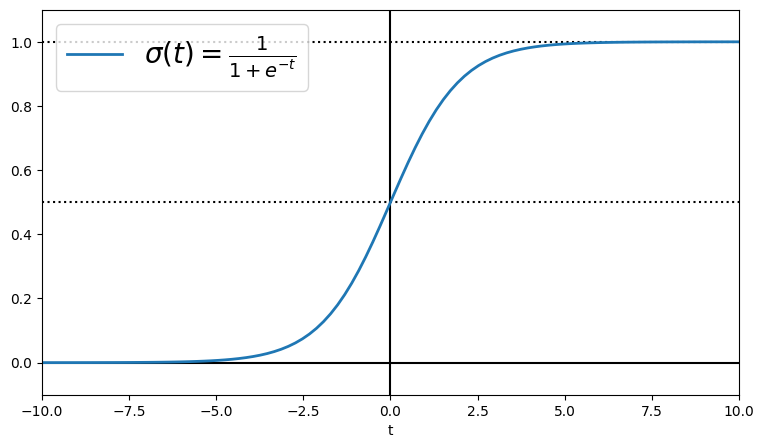

In [58]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 5))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.style.use('dark_background')
plt.show()

## Decision boundary with iris data

In [59]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [60]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(int)

In [61]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

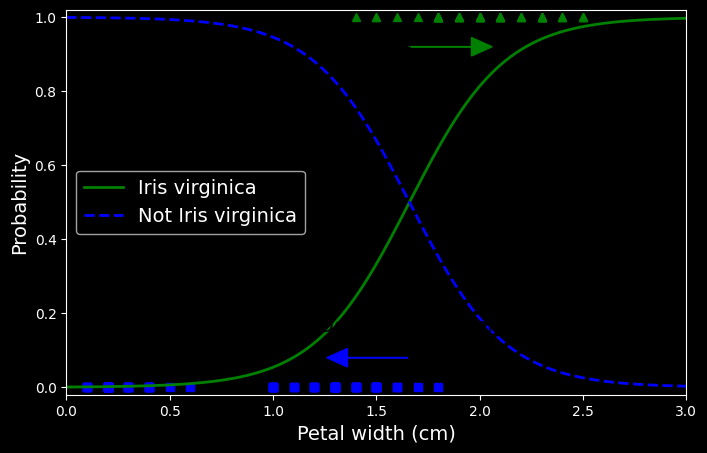

In [62]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 5))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

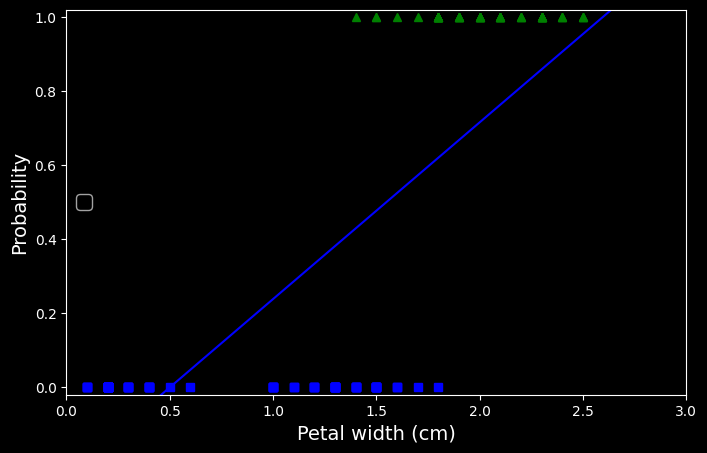

In [63]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_pred = linear_reg.predict(X_new)

plt.figure(figsize=(8, 5))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot(X_new, y_pred, c='b')


plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

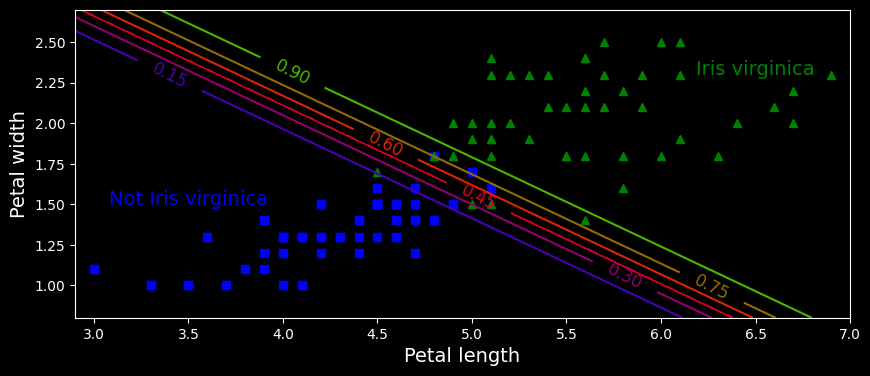

In [64]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## Logistic Regression Modeling

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 training accuracy : 95.52404719954201 %
로지스틱 회귀 testing accuracy : 91.87134210394677 %
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      9982
           1       0.92      0.92      0.92     10009

    accuracy                           0.92     19991
   macro avg       0.92      0.92      0.92     19991
weighted avg       0.92      0.92      0.92     19991

--------------------------------------------------------------------------
[[9187  795]
 [ 830 9179]]
--------------------------------------------------------------------------
로지스틱 회귀 수행시간 :
13.531169652938843


<Figure size 2000x2000 with 0 Axes>

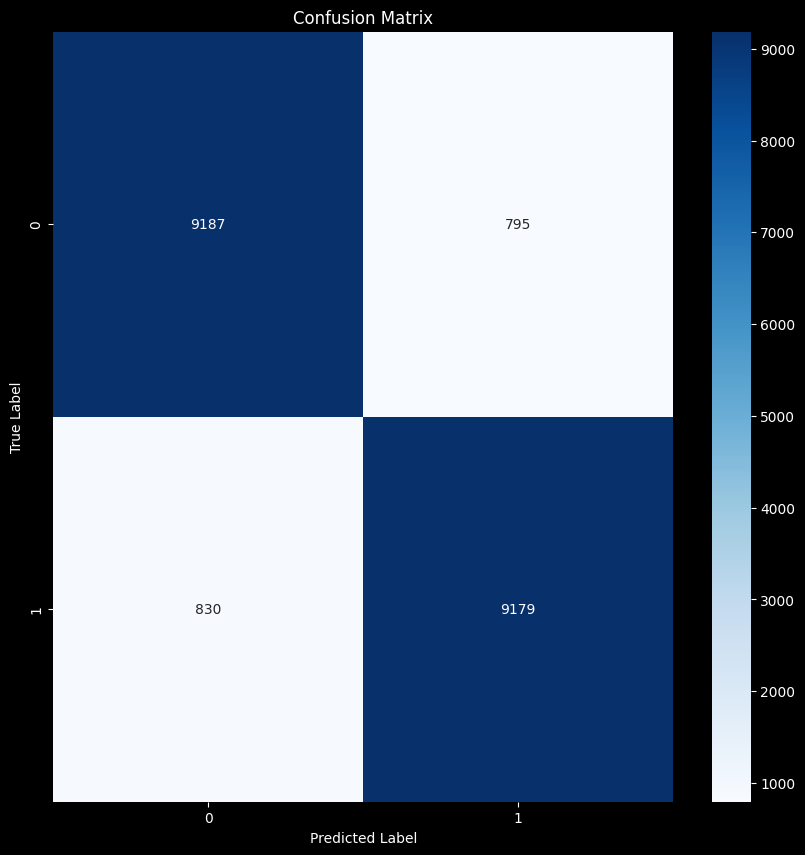

Text(0.5, 1.0, '<< Logistic Regression >>')

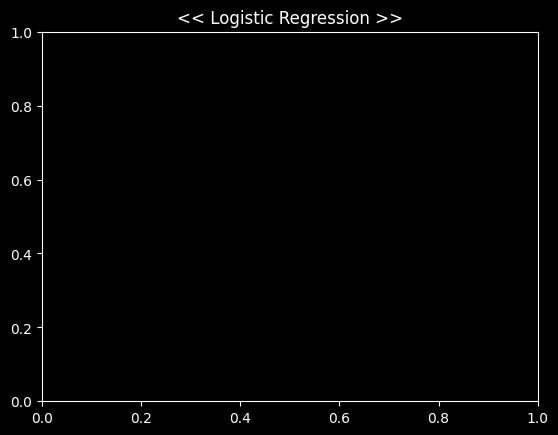

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def custom_plot_confusion_matrix(estimator, X, y_true, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, estimator.predict(X))
    classes = list(set(y_true))
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, cmap=cmap, fmt='g', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

start = time.time()
lr = LogisticRegression(C=3, max_iter=100, random_state=0)

lr.fit( train_tfidf, y_train )
lr_pred = lr.predict( test_tfidf )
lr_acc = lr.score( test_tfidf, y_test )
print("로지스틱 회귀 training accuracy :", lr.score( train_tfidf , y_train )*100, "%")
print("로지스틱 회귀 testing accuracy :", lr_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report( y_test, lr_pred ))
print("--------------------------------------------------------------------------")
print(confusion_matrix( y_test, lr_pred ))
print("--------------------------------------------------------------------------")

end = time.time()
print('로지스틱 회귀 수행시간 :')
print(end - start)

plt.figure(figsize=(20, 20))
custom_plot_confusion_matrix(lr , test_tfidf , y_test , cmap='Blues')
plt.title("<< Logistic Regression >>")


로지스틱 회귀 **training** accuracy : 95.52404719954201 %

로지스틱 회귀 **testing** accuracy : 91.87134210394677 %

--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      9982
           1       0.92      0.92      0.92     10009

    accuracy                           0.92     19991

--------------------------------------------------------------------------
로지스틱 회귀 수행시간 :
13.531169652938843 sec

## Parameter Tuning

In [82]:
from sklearn.model_selection import GridSearchCV
import numpy as np

lr = LogisticRegression( random_state = 0 )

params = {'C' : [3, 3.5, 4, 4.5, 5, 6],
          'max_iter' : [10, 50, 100, 1000],
          "penalty":["l1","l2"]
          }
lr_grid_cv = GridSearchCV(lr,
                          param_grid=params,
                          cv=3,
                          scoring='accuracy',
                          verbose=1)
lr_grid_cv

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [3, 3.5, 4, 4.5, 5, 6],
                         'max_iter': [10, 50, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [83]:
import time
start = time.time()
lr_grid_cv.fit(train_tfidf, y_train)
print("로지스틱 최적 점수 : {}".format(lr_grid_cv.best_score_))
print("로지스틱 최적 파라미터 : {}".format(lr_grid_cv.best_params_))
print(lr_grid_cv.best_estimator_)
end = time.time()
print("--------------------------------------------------------------------")
print('Execution time is:')
print(end - start)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

로지스틱 최적 점수 : 0.912704189950686
로지스틱 최적 파라미터 : {'C': 3.5, 'max_iter': 50, 'penalty': 'l2'}
LogisticRegression(C=3.5, max_iter=50, random_state=0)
--------------------------------------------------------------------
Execution time is:
644.2018070220947


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 최적 점수 : 0.912704189950686
로지스틱 최적 파라미터 : {'C': 3.5, 'max_iter': 50, 'penalty': 'l2'}

LogisticRegression(C=3.5, max_iter=50, random_state=0)

--------------------------------------------------------------------

Execution time is:
644.2018070220947 sec

## Naive Bayse

Naive Bayes training accuracy : 93.4831060989234 %
Naive Bayes testing accuracy : 91.63623630633785 %
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      9982
           1       0.92      0.91      0.92     10009

    accuracy                           0.92     19991
   macro avg       0.92      0.92      0.92     19991
weighted avg       0.92      0.92      0.92     19991

--------------------------------------------------------------------------
[[9223  759]
 [ 913 9096]]
--------------------------------------------------------------------------


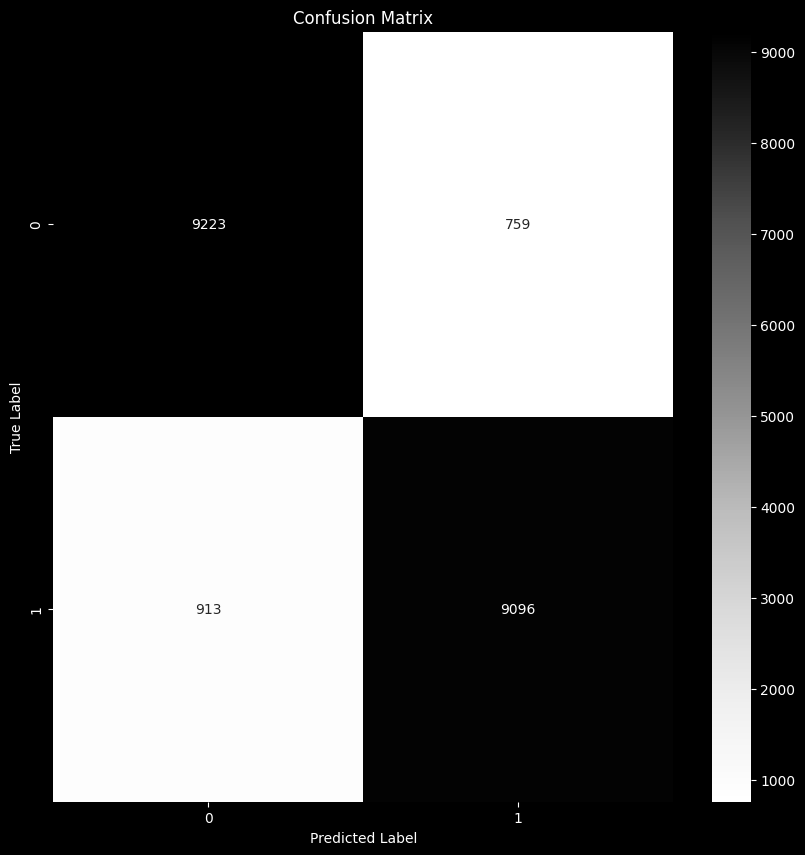

--------------------------------------------------------------------------
Execution time is:
1.8373332023620605


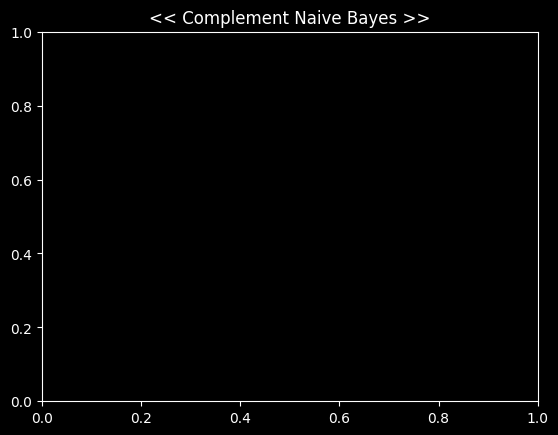

In [150]:
from sklearn.naive_bayes import ComplementNB
import matplotlib.pyplot as plt
start = time.time()
nb_clf = ComplementNB(alpha=0.8)
nb_clf.fit(train_tfidf, y_train)
nb_pred = nb_clf.predict( test_tfidf )
nb_acc = nb_clf.score( test_tfidf , y_test )
print("Naive Bayes training accuracy :", nb_clf.score( train_tfidf , y_train )*100, "%")
print("Naive Bayes testing accuracy :", nb_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report(y_test, nb_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test, nb_pred))
print("--------------------------------------------------------------------------")
custom_plot_confusion_matrix(nb_clf, test_tfidf , y_test, cmap='Greys')
plt.title("<< Complement Naive Bayes >>")
end = time.time()
print("--------------------------------------------------------------------------")
print('Execution time is:')
print(end - start)

Naive Bayes training accuracy : 93.4831060989234 %
Naive Bayes testing accuracy : 91.63623630633785 %
--------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      9982
           1       0.92      0.91      0.92     10009

    accuracy                            0.92     19991
    macro avg       0.92      0.92      0.92     19991
    weighted avg    0.92      0.92      0.92     19991

--------------------------------------------------------------------------
Execution time is:
0.3729233741760254 sec

## Parameter Tuning

In [87]:
params = {'alpha': [0.3, 0.45, 0.5, 0.55, 0.8]
         }
nb_clf = ComplementNB()
nb_grid_cv = GridSearchCV(nb_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
import time
start = time.time()
nb_grid_cv.fit(train_tfidf, y_train)
print("나이브 베이즈 최적 점수 : {}".format(nb_grid_cv.best_score_))
print("나이브 베이즈 최적 파라미터 : {}".format(nb_grid_cv.best_params_))
print(nb_grid_cv.best_estimator_)
end = time.time()
print("--------------------------------------------------------------------------")
print('Execution time is:')
print(end - start)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
나이브 베이즈 최적 점수 : 0.9124040558166838
나이브 베이즈 최적 파라미터 : {'alpha': 0.5}
ComplementNB(alpha=0.5)
--------------------------------------------------------------------------
Execution time is:
0.9669263362884521


나이브 베이즈 최적 점수 : 0.9124040558166838
나이브 베이즈 최적 파라미터 : {'alpha': 0.5}

--------------------------------------------------------------------------

Execution time is:
0.9669263362884521 sec

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()
dt_clf = DecisionTreeClassifier()
dt_clf.fit( train_tfidf, y_train )
dt_clf_pred = dt_clf.predict(test_tfidf)
dt_clf_acc = dt_clf.score(test_tfidf, y_test )
print("의사결정나무 training accuracy  :", dt_clf.score( train_tfidf, y_train )*100, "%")
print("의사결정나무 test accuracy :", dt_clf_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report(y_test, dt_clf_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test, dt_clf_pred))
print("--------------------------------------------------------------------------")
end = time.time()
print('Execution time is:')
print(end - start)
custom_plot_confusion_matrix(dt_clf, test_tfidf, y_test , cmap='Reds')
plt.title("<< Decision Tree >>")

## Create Accuracy Data Frame

In [88]:
import pandas as pd
models_acc = {'로지스틱 회귀': lr_acc*100,
              '나이브 베이즈':	nb_acc*100  ,
              #'의사결정나무' : dt_clf_acc*100

              }
models_acc_df = pd.DataFrame(pd.Series(models_acc))
models_acc_df.columns = ['정확도']
models_acc_df['모델'] = ['로지스틱 회귀',
                       '나이브 베이즈',
                       #'의사결정나무'
                       ]
models_acc_df.set_index(pd.Index([1, 2]))

,정확도,모델
1,91.871342,로지스틱 회귀
2,91.636236,나이브 베이즈


## Accuracy Bar Graph

In [89]:
import plotly.express as px
fig = px.bar(models_acc_df,
             x='정확도',
             y='모델' ,
             color='모델',
             range_x=(50, 100),
             template="plotly_white",
             text_auto='.4s',
             title="<< 최종 모델평가 >>" )

fig.update_traces(textfont_size=15, textangle=0, textposition="inside")
fig.update_yaxes(categoryorder="total ascending")
fig.update_layout(height = 600, width = 1200, hovermode = 'closest')

In [90]:
import plotly.express as px

df = px.data.tips()
fig = px.histogram(df, x="sex", y="total_bill",
             color='smoker', barmode='group',
             histfunc='avg',
             height=400)
fig.show()

## Start precision

In [188]:
st = input("감성을 분석할 문장을 입력하세요: \n")

감성을 분석할 문장을 입력하세요: 
진짜 장난치나요 사장님 ??? 너무 맛있는거 아닙니까.. 술 없이는 못 베기는 곳이에요.. 사장님 미모도 보러 갈 겸 다들 가세요 .. 사장님 미모는 제가 장담합니다 ... 맛도 최고 가성비 갓 ... 내일 또 가고픈 곳


In [189]:
st = re.compile(r'[ㄱ-ㅣ가-힣0-9]+').findall(st)
print(st)

st = [" ".join(st)]
print(st)

['진짜', '장난치나요', '사장님', '너무', '맛있는거', '아닙니까', '술', '없이는', '못', '베기는', '곳이에요', '사장님', '미모도', '보러', '갈', '겸', '다들', '가세요', '사장님', '미모는', '제가', '장담합니다', '맛도', '최고', '가성비', '갓', '내일', '또', '가고픈', '곳']
['진짜 장난치나요 사장님 너무 맛있는거 아닙니까 술 없이는 못 베기는 곳이에요 사장님 미모도 보러 갈 겸 다들 가세요 사장님 미모는 제가 장담합니다 맛도 최고 가성비 갓 내일 또 가고픈 곳']


In [190]:
st_tfidf = tfidf.transform(st)
st_tfidf

<1x197019 sparse matrix of type '<class 'numpy.float64'>'
	with 41 stored elements in Compressed Sparse Row format>

In [191]:
st_predict = lr_grid_cv.best_estimator_.predict(st_tfidf)
st_predict

array([1])

In [192]:
if(st_predict ==0):
    print(st, "->> 부정 감성")
else:
    print(st, "->> 긍정 감성")

['진짜 장난치나요 사장님 너무 맛있는거 아닙니까 술 없이는 못 베기는 곳이에요 사장님 미모도 보러 갈 겸 다들 가세요 사장님 미모는 제가 장담합니다 맛도 최고 가성비 갓 내일 또 가고픈 곳'] ->> 긍정 감성


In [193]:
st_transformed = tfidf.transform(st)
st_prediction = lr_grid_cv.best_estimator_.predict(st_transformed)
st_probabilities = lr_grid_cv.best_estimator_.predict_proba(st_transformed)

print(f"예측 클래스: {st_prediction[0]}")
print(f"클래스 확률: {st_probabilities[0]}")


예측 클래스: 1
클래스 확률: [0.14538362 0.85461638]


In [197]:
st_transformed = tfidf.transform(st)
token_coeff_pairs = [(tfidf.get_feature_names_out()[index], lr_grid_cv.best_estimator_.coef_[0][index]) for index in non_zero_indices]
sorted_token_coeff_pairs = sorted(token_coeff_pairs, key=lambda x: x[1], reverse=True)

print("긍정적에 영향을 주는 토큰 상위 5개:")
for token, coef in sorted_token_coeff_pairs[:5]:
    print(f"{token}: {coef}")

print("\n부정적에 영향을 주는 토큰 상위 5개:")
for token, coef in sorted_token_coeff_pairs[-5:]:
    print(f"{token}: {coef}")


긍정적에 영향을 주는 토큰 상위 5개:
최고: 9.60346098923878
가성: 4.380648605959796
내일: 2.8612561663994938
겸: 2.4966741322304014
가성 비: 2.322054266549621

부정적에 영향을 주는 토큰 상위 5개:
는: -1.7689250784290118
비: -1.8283411189062218
술: -2.0135757992117775
너무: -4.8127718248940115
못: -7.204901977279271
